In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [159]:
offers = pd.DataFrame(pd.read_csv("../data/processed_data/data_final.csv", index_col=0, parse_dates=True).loc[:, "offers"])

In [160]:
# function to define Recursive Filter
def RF(df, y_name, std, window):
    """ Generate data frame with spike occurance information including upper and lower limits.
    Use Recursive filter. Both standard deviations and window required for filter definition """
    df['sma'] = df[y_name].rolling(window = window).mean()
    df['std'] = df[y_name].rolling(window = window).std()
    df['spike_upperlim'] = df['sma'] + (std * df['std'])
    df['spike_lowerlim'] = df['sma'] - (std * df['std'])
    df['spike_occurance'] = ((df[y_name] > df['spike_upperlim']) | (df[y_name] < df['spike_lowerlim'])).astype(np.int)
    df.fillna(0, inplace=True)
    num_spikes, num_non_spikes = (df['spike_occurance'] == 1).sum(), (df['spike_occurance'] == 0).sum()
    return df, [num_spikes, num_non_spikes]

### Test RF for different window values for 2 standard deviation

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_upperlim'] = df['sma'] + (std * df['std'])
<ipython-input-160-cf935996a9d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_lowerlim'] = df['sma'] - (std * df['std'])
<ipython-input-160-cf935996a9d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

<ipython-input-160-cf935996a9d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_occurance'] = ((df[y_name] > df['spike_upperlim']) | (df[y_name] < df['spike_lowerlim'])).astype(np.int)
/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_upperlim'] = df['sma'] + (std * df['std'])
<ipython-input-160-cf935996a9d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_lowerlim'] = df['sma'] - (std * df['std'])
<ipython-input-160-cf935996a9d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

<ipython-input-160-cf935996a9d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_occurance'] = ((df[y_name] > df['spike_upperlim']) | (df[y_name] < df['spike_lowerlim'])).astype(np.int)
/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-160-cf935996a9d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_occurance'] = ((df[y_name] > df['spike_upperlim']) | (df[y_name] < df['spike_lowerlim'])).astype(np.int)
/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-160-cf935996a9d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_occurance'] = ((df[y_name] > df['spike_upperlim']) | (df[y_name] < df['spike_lowerlim'])).astype(np.int)
/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-160-cf935996a9d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_lowerlim'] = df['sma'] - (std * df['std'])
<ipython-input-160-cf935996a9d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_occurance'] = ((df[y_name] > df['spike_upperlim']) | (df[y_name] < df['spike_lowerlim'])).astype(np.int)
/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

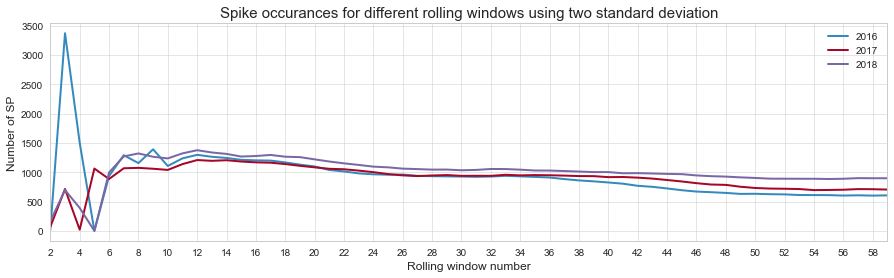

In [216]:
range_window = np.arange(2, 60, 1)
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (15,4)

for year in [2016, 2017, 2018]:
    num_spikes=[]
    num_no_spikes=[]
    
    for w in range_window:
        data, counts = RF(offers[offers.index.year == year], "offers", 2, w)
        
        num_spikes.append(counts[0])
        num_no_spikes.append(counts[1])
        
    results = pd.DataFrame({'window': range_window, 'num_spikes': num_spikes, 'num_no_spike': num_no_spikes})
    plt.plot(range_window, results['num_spikes'], label = str(year))
    
plt.ylabel('Number of SP')
plt.xlabel('Rolling window number')
plt.title('Yearly spike occurances for different rolling windows using two standard deviation', fontsize= 15)
plt.minorticks_on()
plt.xlim(min(range_window), max(range_window))
# plt.grid(which = 'major', linestyle ='-', linewidth = '0.25', color = 'black')
plt.xticks(np.arange(min(range_window), max(range_window), 2))
plt.legend()
plt.show()

### Test RF for different window values for 1 standard deviation

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

<ipython-input-160-cf935996a9d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_lowerlim'] = df['sma'] - (std * df['std'])
<ipython-input-160-cf935996a9d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_occurance'] = ((df[y_name] > df['spike_upperlim']) | (df[y_name] < df['spike_lowerlim'])).astype(np.int)
/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_upperlim'] = df['sma'] + (std * df['std'])
<ipython-input-160-cf935996a9d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_upperlim'] = df['sma'] + (std * df['std'])
<ipython-input-160-cf935996a9d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_lowerlim'] = df['sma'] - (std * df['std'])
<ipython-input-160-cf935996a9d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

<ipython-input-160-cf935996a9d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_lowerlim'] = df['sma'] - (std * df['std'])
<ipython-input-160-cf935996a9d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_occurance'] = ((df[y_name] > df['spike_upperlim']) | (df[y_name] < df['spike_lowerlim'])).astype(np.int)
/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_upperlim'] = df['sma'] + (std * df['std'])
<ipython-input-160-cf935996a9d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spike_upperlim'] = df['sma'] + (std * df['std'])
<ipython-input-160-cf935996a9d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

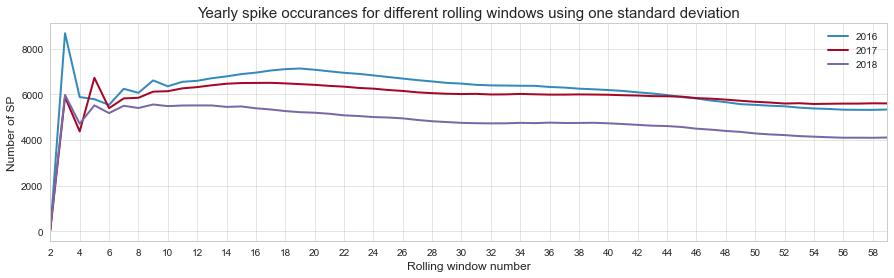

In [217]:
range_window = np.arange(2, 60, 1)
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (15,4)

for year in [2016, 2017, 2018]:
    num_spikes=[]
    num_no_spikes=[]
    
    for w in range_window:
        data, counts = RF(offers[offers.index.year == year], "offers", 1, w)
        
        num_spikes.append(counts[0])
        num_no_spikes.append(counts[1])
        
    results = pd.DataFrame({'window': range_window, 'num_spikes': num_spikes, 'num_no_spike': num_no_spikes})
    plt.plot(range_window, results['num_spikes'], label = str(year))
    
plt.ylabel('Number of SP')
plt.xlabel('Rolling window number')
plt.title('Yearly spike occurances for different rolling windows using one standard deviation', fontsize= 15)
# plt.minorticks_on()
plt.xlim(min(range_window), max(range_window))
# plt.grid(which = 'major', linestyle ='-', linewidth = '0.25', color = 'black')
plt.xticks(np.arange(min(range_window), max(range_window), 2))
plt.legend()
plt.show()

### Visualise data testing different rolling window and standard deviation values for RF

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

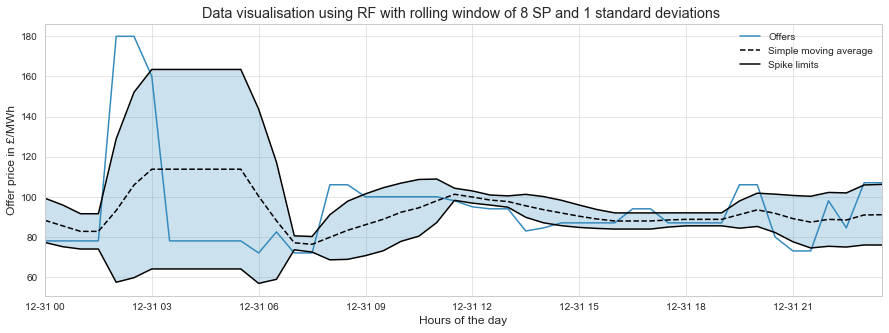

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

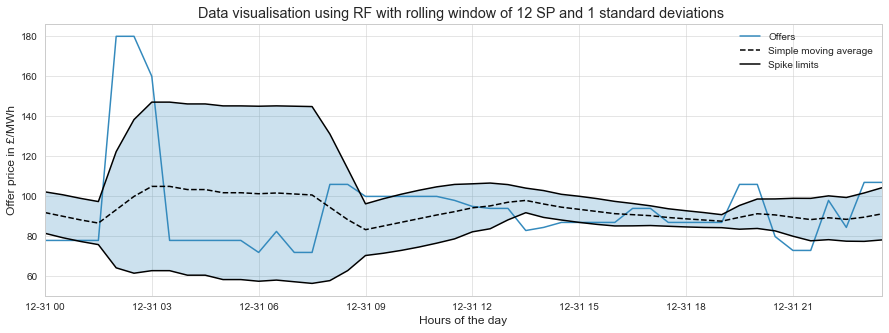

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

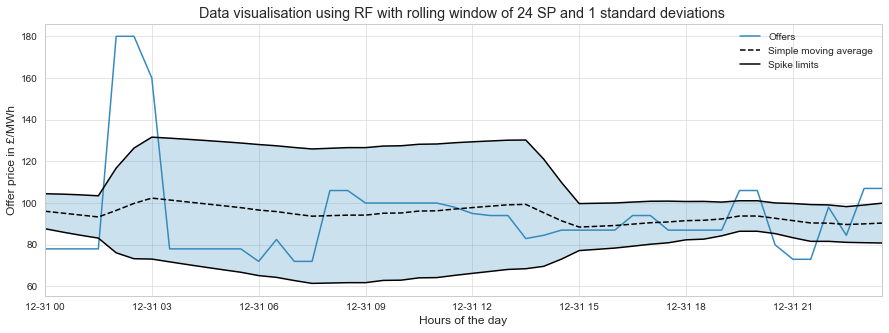

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

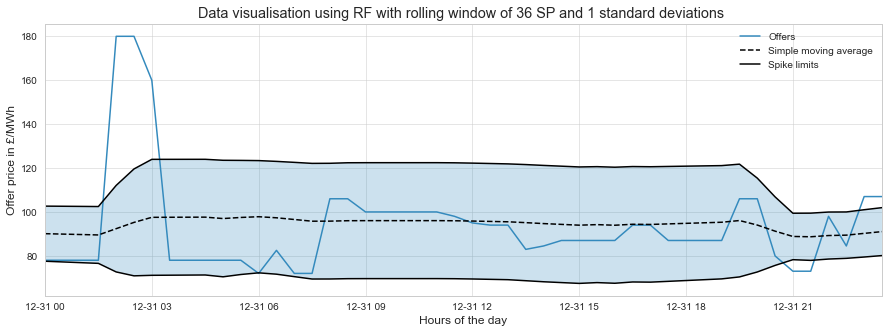

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

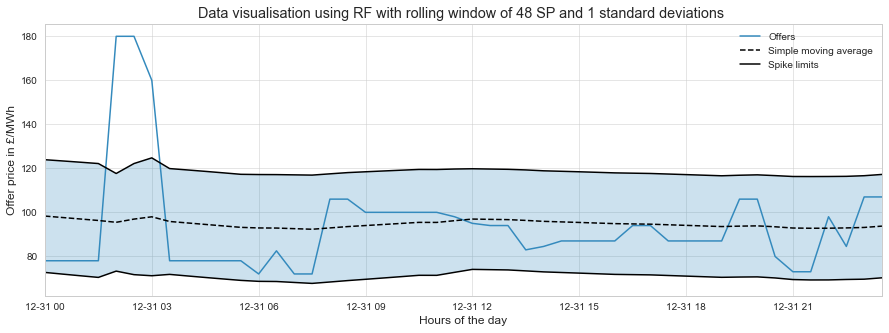

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

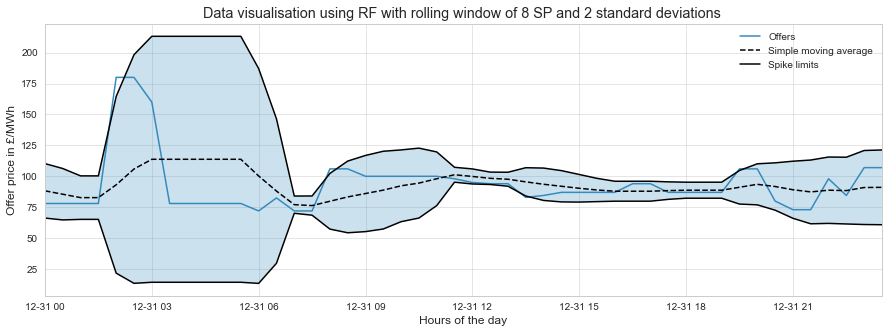

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

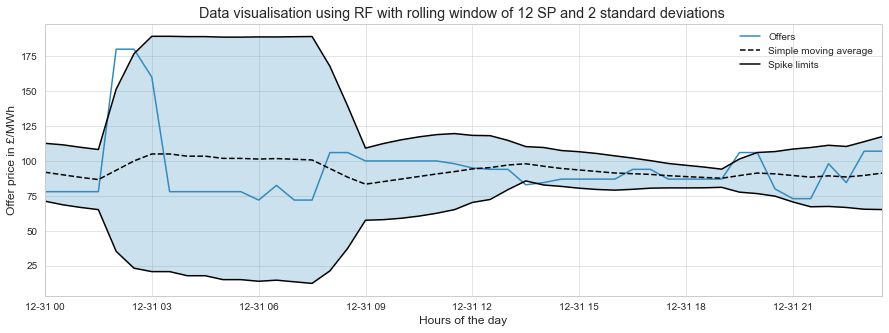

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

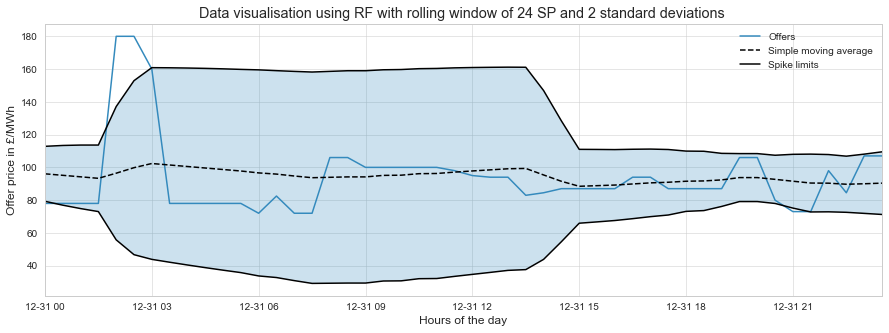

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

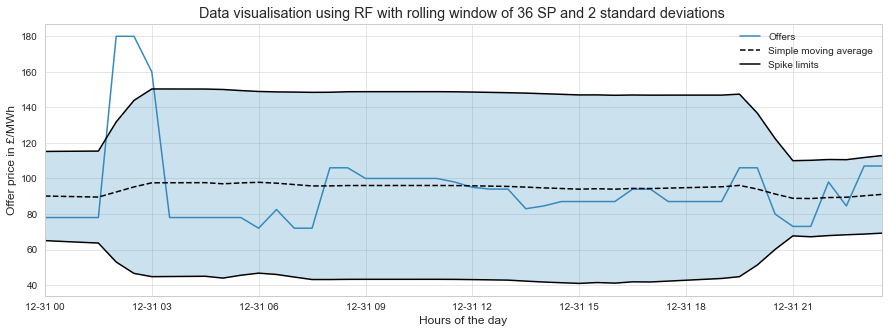

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

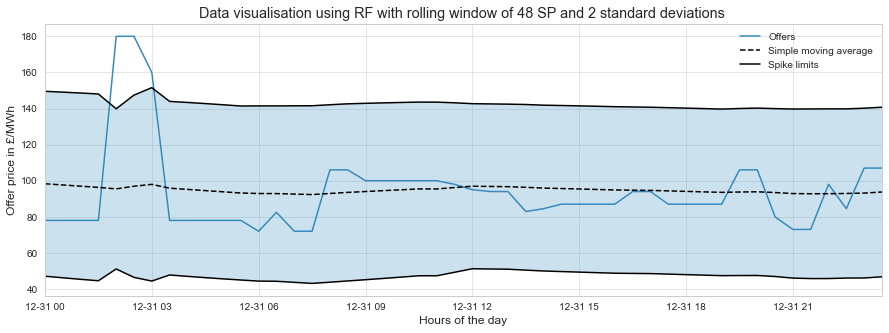

In [219]:
for std in [1, 2]:
    for window in [8, 12, 24, 36, 48]:
    
        data, _ = RF(offers[offers.index.year == 2018], "offers", std, window)

        plt.figure(figsize=(15, 5))

        plt.plot(data.iloc[-48:, 0], label = "Offers", linewidth = 1.5) # color = 'steelblue')
        plt.plot(data.iloc[-48:, 1], label = "Simple moving average", linestyle = 'dashed', linewidth = 1.5, color = 'black')
        plt.plot(data.iloc[-48:, 3], color = 'black', linewidth = 1.5)
        plt.plot(data.iloc[-48:, 4], label = "Spike limits", color = 'black', linewidth = 1.5)
        plt.fill_between(data.iloc[-48:, :].index, data.iloc[-48:, 4], data.iloc[-48:, 3], alpha=0.25)

        plt.title(f"Data visualisation using RF with rolling window of {window} SP and {std} standard deviations ")
        plt.legend()
        plt.xlim(datetime(2018, 12, 31), datetime(2018, 12, 31, 23, 30))
        
        # plt.ylim(data.shape[0] - 48, data.shape[0]) 
        plt.ylabel('Offer price in £/MWh')
        plt.xlabel('Hours of the day')
        plt.show()

### Plot spike and non spike values for 2018

<ipython-input-67-354b0c6cb84b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-67-354b0c6cb84b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-67-354b0c6cb84b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

<ipython-input-67-354b0c6cb84b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-67-354b0c6cb84b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-67-354b0c6cb84b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

<ipython-input-67-354b0c6cb84b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-67-354b0c6cb84b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-67-354b0c6cb84b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

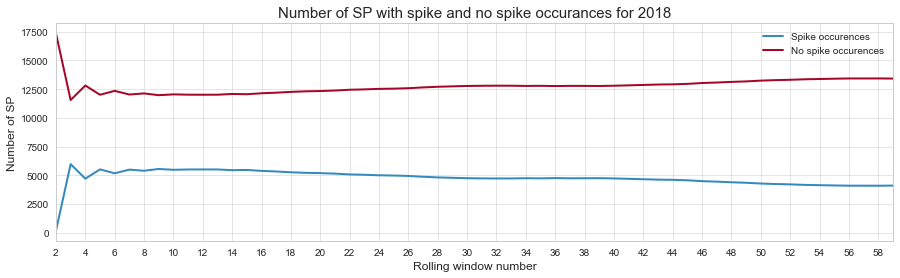

In [112]:
range_window = np.arange(2, 60, 1)
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (15,4)

num_spikes=[]
num_no_spikes=[]

for w in range_window:
    data, counts = RF(offers[offers.index.year == 2018], "offers", 1, w)

    num_spikes.append(counts[0])
    num_no_spikes.append(counts[1])


results = pd.DataFrame({'window': range_window, 'num_spikes': num_spikes, 'num_no_spike': num_no_spikes})

plt.plot(range_window, results['num_spikes'], label ="Spike occurences")
plt.plot(range_window, results['num_no_spike'], label ="No spike occurences")

plt.ylabel('Number of SP')
plt.xlabel('Rolling window number')
plt.title('Number of SP with spike and no spike occurances for 2018', fontsize= 15)
plt.xlim(min(range_window), max(range_window))
plt.xticks(np.arange(min(range_window), max(range_window), 2))
plt.legend()
plt.show()

### Spikes per month for all years

<ipython-input-160-cf935996a9d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = df[y_name].rolling(window = window).mean()
<ipython-input-160-cf935996a9d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df[y_name].rolling(window = window).std()
<ipython-input-160-cf935996a9d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

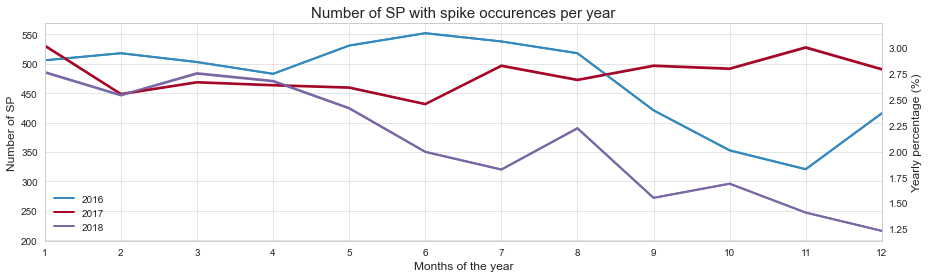

In [164]:
range_window = np.arange(2, 60, 1)
# plt.style.use("seaborn-whitegrid")
# plt.rcParams["figure.figsize"] = (15,4)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


num_spikes=[]
num_no_spikes=[]

for year in [2016, 2017, 2018]:
    data, counts = RF(offers[offers.index.year == year], "offers", 1, 48)
    
    # add months to groupby
    data["month"] = data.index.month
    
    # calculate spike occurences per year and plot
    spikes_num = data.groupby("month").sum()["spike_occurance"]

    ax1.plot(spikes_num.index, spikes_num, label = str(year))
    
    total = data.shape[0]
    
    ax2.plot(spikes_num.index, (spikes_num/total) * 100, label = str(year))
    
ax2.set_ylabel('Yearly percentage (%)')
     
ax1.set_ylabel('Number of SP')
ax1.set_xlabel('Months of the year')
ax1.set_title('Number of SP with spike occurences per year', fontsize= 15)

ax1.set_xticks(np.arange(1, 14, 1))
ax1.set_xlim(1, 12)
ax1.legend()
plt.grid()
plt.show()

### Save data set

In [222]:
data, counts = RF(offers, "offers", 1, 48)

In [223]:
data.to_csv("spike_binary.csv")